In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
sns.set()


In [26]:
df = pd.read_csv("Auto.csv")

#remove any non-numerical data (? values)
df[df.columns[:-2]] = df[df.columns[:-2]].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)

QUESTION 1:

a)

In [27]:
x = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
# print("Coeff of determination (R^2): {}".format(reg.score(x, y)))
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
print(model.summary()) 


print("Predicted mpg with a horsepower of 95: {}".format(reg.predict([[95]])[0][0]))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           7.03e-81
Time:                        18:40:06   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

<p>
i) As the coeff of determination (R^2) is relatively close to 1, there is a relationship between the predictor and the response. The p-value is also very small for the linear regression with mpg and horsepower
</p>
<p>
ii) The relationship between the predictor and response is strong. The p value is small when performing a t-test, and the coefficient of determination is also .606, which indicates that almost 60.6% of the variability in mpg can be explained by horsepower.
</p>
<p>
iii) The relationship between the predictor and response is negative. We can see this, as the  coefficient of x1 (our predictor) is negative. 
</p>
<p>
iv) The predicted mpg with a horsepower of 95 is 24.94061135257337
</p>

b)

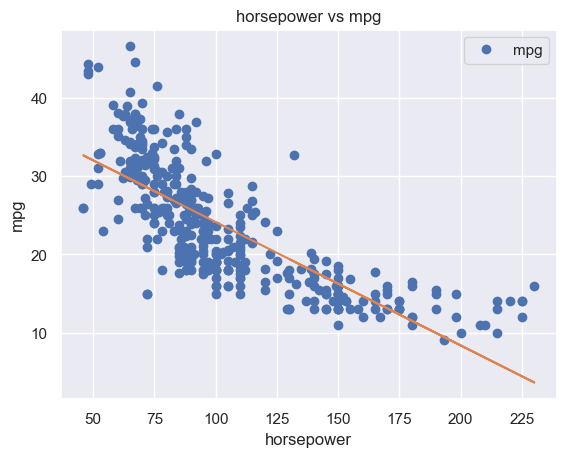

In [28]:
ypred = reg.predict(x)
df.plot(x='horsepower', y='mpg', style='o')
plt.title("horsepower vs mpg")
plt.ylabel('mpg')
plt.plot(x, ypred)
plt.show()

2)
a)

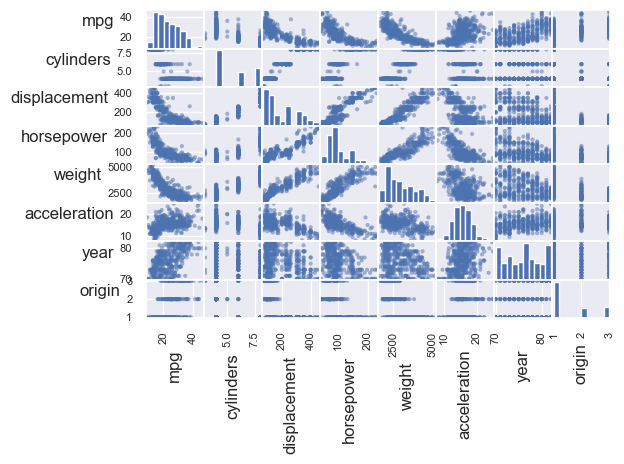

In [29]:
axes = pd.plotting.scatter_matrix(df)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

b)

In [30]:
corrM = df.corr() #no names
print(corrM)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

C:\Users\Bernhard\AppData\Local\Temp\ipykernel_41592\2646264494.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = df.corr() #no names


c)

In [31]:
dfplot = df.drop(["mpg","name"], axis = 1)

x = dfplot
y = df['mpg'].values.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
print("Coeff of determination (R^2): {}".format(reg.score(x, y)))
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
print(model.summary()) 

Coeff of determination (R^2): 0.8214780764810599
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          2.04e-139
Time:                        18:40:08   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

i) there is a strong relationship between the predictors and the response


ii) weight, year, origin, and displacement seem to have statistically significant relationships to the response.


iii) the coefficient for 'year' suggests that as the year increases, the mpg of the vehicle increases as well by a factor of .75 assuming that all other predictors are constant. 

d)

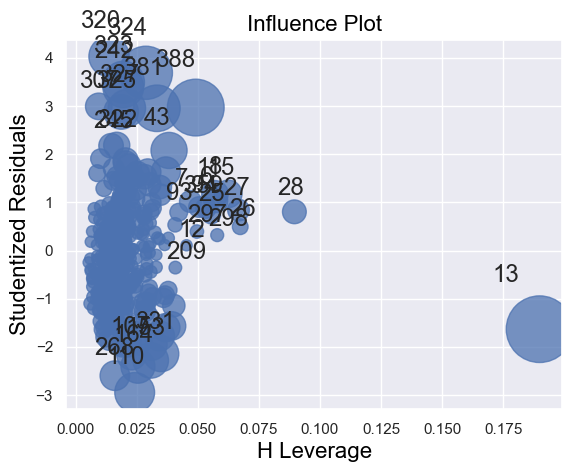

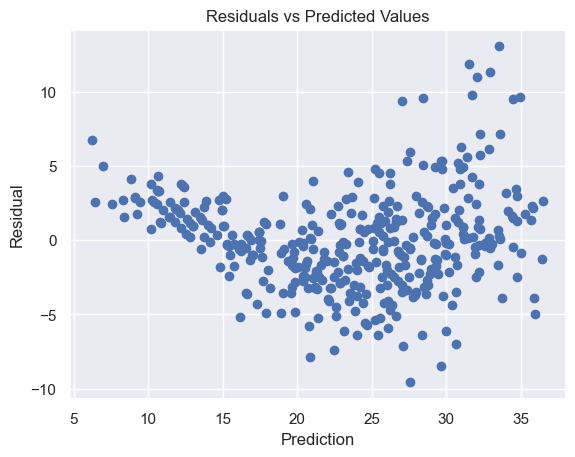

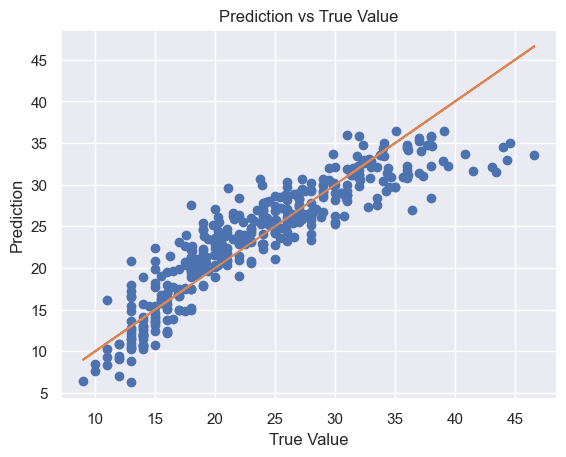

In [32]:
# ypred = reg.predict(x)
# df.plot(x='horsepower', y='mpg', style='o')
# plt.title("horsepower vs mpg")
# plt.ylabel('mpg')
# plt.plot(x, ypred)
# plt.show()

y_pred=reg.predict(x)
resid = y-y_pred


sm.graphics.influence_plot(model)
plt.show()

plt.plot(y_pred,resid,'o')  
plt.title('Residuals vs Predicted Values')  
plt.ylabel('Residual')  
plt.xlabel('Prediction')  
plt.show()

# Input vs Error
plt.plot(y,y_pred,'o')
plt.plot(y,y)
plt.title('Prediction vs True Value')  
plt.xlabel('True Value')  
plt.ylabel('Prediction')  
plt.show()


The error vs predicted values chart seems to have a slight curve, which means that the relationship of the data is non-linarly associated. We might use non-linear transformations of the predictors such as log(x).
The error terms also show a non-constant variance, which could be solved by using a non-linear transformation. 
The Influence plot reveals no real outliers, but reveals a very high leverage data point, point 13 (starting count from 0). Observation 28 also has a relatively high leverage.
We can assess that observations 320, 324, 28 and 13 are likely outliers in our data along with other observations with a studentized residual of 3 or more.
Most of our observations have a leverage lesser than 0.075 with the exception of two observations: 28, and 13.

e1)

In [33]:
model_interaction = smf.ols(formula='mpg ~ weight + cylinders + weight:cylinders', data = df).fit()
summary = model_interaction.summary()
print(summary.tables[1])

model_interaction = smf.ols(formula='mpg ~ horsepower + acceleration + horsepower:acceleration', data = df).fit()
summary = model_interaction.summary()
print(summary.tables[1])

model_interaction = smf.ols(formula='mpg ~ displacement + year + displacement:year', data = df).fit()
summary = model_interaction.summary()
print(summary.tables[1])

model_interaction = smf.ols(formula='mpg ~ horsepower + displacement + horsepower:displacement', data = df).fit()
summary = model_interaction.summary()
print(summary.tables[1])


                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           65.3865      3.733     17.514      0.000      58.046      72.727
weight              -0.0128      0.001     -9.418      0.000      -0.016      -0.010
cylinders           -4.2098      0.724     -5.816      0.000      -5.633      -2.787
weight:cylinders     0.0011      0.000      5.226      0.000       0.001       0.002
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  33.5124      3.420      9.798      0.000      26.788      40.237
horsepower                  0.0176      0.027      0.641      0.522      -0.036       0.072
acceleration                0.8003      0.212      3.777      0.000       0.384       1.217
horsepower:acceleration    -0.

Interactions between weight and cylinders, and interactions between horsepower and acceleration seemed to be statistically significant (low p value). Interactions between displacement and year, and horsepower and displacement also seemed to be significant.

e2)

In [34]:
model_interaction = smf.ols(formula='mpg ~ weight:cylinders', data = df).fit()
summary = model_interaction.summary()
print(summary.tables[1])

model_interaction = smf.ols(formula='mpg ~ horsepower:acceleration', data = df).fit()
summary = model_interaction.summary()
print(summary.tables[1])


model_interaction = smf.ols(formula='mpg ~ displacement:weight', data = df).fit()
summary = model_interaction.summary()
print(summary.tables[1])


                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           34.2948      0.464     73.906      0.000      33.382      35.207
weight:cylinders    -0.0006   2.28e-05    -27.029      0.000      -0.001      -0.001
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  47.7299      0.978     48.789      0.000      45.807      49.653
horsepower:acceleration    -0.0157      0.001    -25.612      0.000      -0.017      -0.014
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              31.2634      0.388     80.588      0.000      30.501      32.026
displacement:weight -1.182e-

There is a significance in the interaction between weight and cylinders, horsepower and acceleration, and displacement and weight. 

f)

In [35]:
#log 
model = smf.ols(formula='mpg ~ cylinders + displacement + np.log(horsepower) + weight + np.log(acceleration) + year + origin', data = df).fit()
summary = model.summary()
print("F value: {}".format(model.fvalue) )
print(model.summary().tables[1]) 

#quadratic
model = smf.ols(formula='mpg ~ cylinders + displacement + np.power(horsepower, 2) + weight + np.power(acceleration,2) + year + origin', data = df).fit()
summary = model.summary()
print("F value: {}".format(model.fvalue) )
print(model.summary().tables[1]) 

F value: 286.8516549018523
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               42.9742     10.630      4.043      0.000      22.075      63.874
cylinders               -0.4384      0.305     -1.439      0.151      -1.037       0.161
displacement             0.0156      0.007      2.231      0.026       0.002       0.029
np.log(horsepower)     -10.4455      1.522     -6.863      0.000     -13.438      -7.453
weight                  -0.0038      0.001     -5.359      0.000      -0.005      -0.002
np.log(acceleration)    -6.1583      1.645     -3.744      0.000      -9.392      -2.925
year                     0.7050      0.048     14.683      0.000       0.611       0.799
origin                   1.4379      0.258      5.574      0.000       0.931       1.945
F value: 256.6597155187827
                                coef    std err         

I tried performing a log transformation, and a quadratic transformation on displacement and horsepower, as they seemed to have a non-linear relationship to mpg in the scatterplot matrix. 
The previous F value for the linear regression is 256. 

The log transformation yielded an F value of 305, which means that we can reject the null hypothesis that hte coefficients are equal to zero. 
The log transformation on displacement increased the p value of the coefficient, and on horsepower significantly decreased the p value of the coefficient. All of the log terms were significant with a 0.05 significance level. 

The quadratic transformation yielded an F value of 256, so we can reject the null hypothesis that the coefficients are equal to zero.
The quadratic transformation on displacement, horsepower, and weight decreased the p value on the displacement coefficient, slightly increased the p value on the horsepower coefficient. All of the squared terms were significant with a 0.05 significance level. 

3)
a)

In [36]:
df = pd.read_csv("Carseats.csv")

#convert to 0 and 1
df['Urban'] = df['Urban'].eq('Yes').mul(1)
df['US'] = df['US'].eq('Yes').mul(1)

x = df[['Price', 'Urban', 'US']]

y = df['Sales'].values.reshape(-1, 1)
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()


# model = smf.ols(formula='Sales ~ Price + Urban + US', data = df).fit()
# summary = model.summary()
print(model.summary()) 
print("RSE: {}".format(np.sqrt(model.scale)))



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           2.39e-23
Time:                        18:40:09   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

b)
<p>For each one unit increase in price, sales decrease by -0.0545 on average while US and Urban are constant. Sales are -0.0219 units lower for observations that are Urban while US and Price are constant, and 1.2006 units higher for observations that are US while Urban and Price are constant</p>

c)
<p>
for non-urban, non-us: Sales = 13.0435 - 0.0545(Price)
<br>for urban, non-us: Sales = 13.0435 - 0.0545(Price) - 0.0219 + e
<br>for non-urban, us: Sales = 13.0435 - 0.0545(Price) + 1.2006 + e
<br>for urban and us: Sales = 13.0435 - 0.0545(Price) - 0.0219 + 1.2006 + e
</p>

d)
<p>
we can reject the null hypothesis for predictors Price and US, as their p value is below our alpha of 0.05. We cannot reject the null hypothesis of Urban, as the p value is very high (above our alpha of 0.05). 
</p>

e)

In [37]:
x = df[['Price', 'US']]

y = df['Sales'].values.reshape(-1, 1)
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()

print(model.summary()) 
print("RSE: {}".format(np.sqrt(model.scale)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           2.66e-24
Time:                        18:40:09   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

f)
The models in a and e likely fit the data okay, as they have a low R-squared value of around 0.24 for both. The RSE of both models are above 1, but relatively close to 1. The model in e has a slightly better RSE, and R squared value, so it fits the data a bit better than the model in a.

g)
  <table>
    <caption>95% confidence interval</caption>
    <tr>
      <th>coefficient</th>
      <th>&gt; 0.025</th>
      <th>&lt; 0.975</th>
    </tr>
    <tr>
      <td>Price</td>
      <td>-0.065</td>
      <td>-0.044</td>
    </tr>
    <tr>
      <td>US</td>
      <td>0.692</td>
      <td>1.708</td>
    </tr>
  </table>

h)

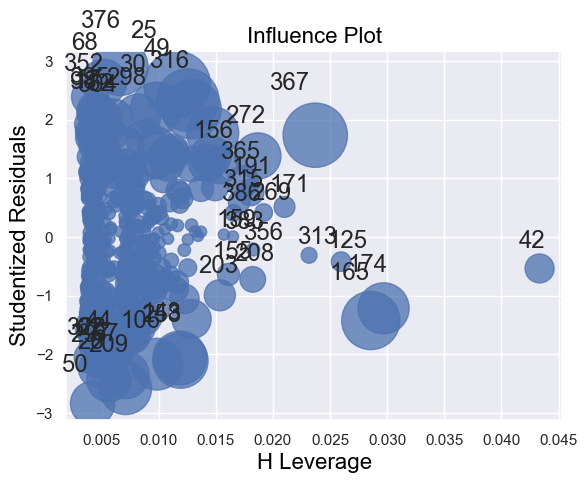

In [38]:
sm.graphics.influence_plot(model)
plt.show()

There is evidence of both outliers and high leverage points in the model. We can see that observation 376 is possibly an outlier, becuase it has a high studentized residual. We can also see that some observations have very high leverage, such as observation 42, as they are far outside the normal amount of leverage for this model, which hovers around about 0.010.

4.
a)

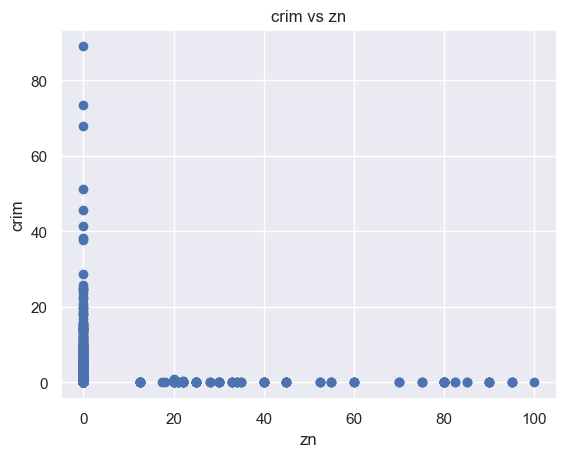

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      0.000       3.634       5.273
zn            -0.0739      0.016     -4.594      0.000      -0.106      -0.042


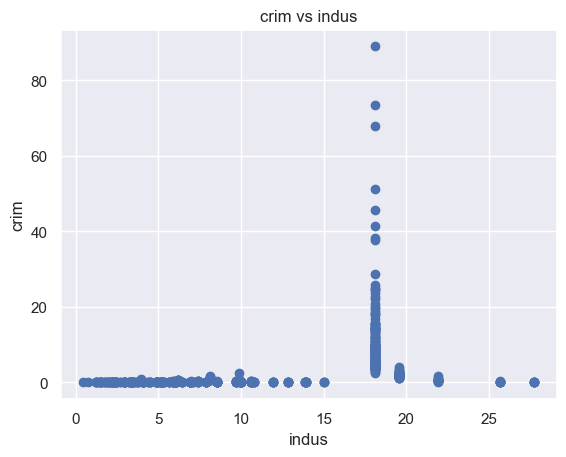

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0637      0.667     -3.093      0.002      -3.375      -0.753
indus          0.5098      0.051      9.991      0.000       0.410       0.610


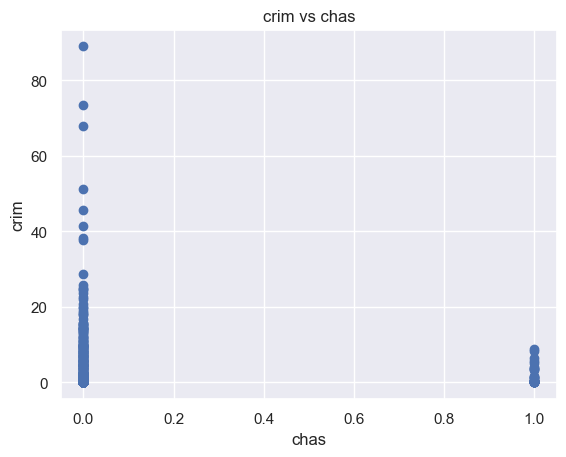

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7444      0.396      9.453      0.000       2.966       4.523
chas          -1.8928      1.506     -1.257      0.209      -4.852       1.066


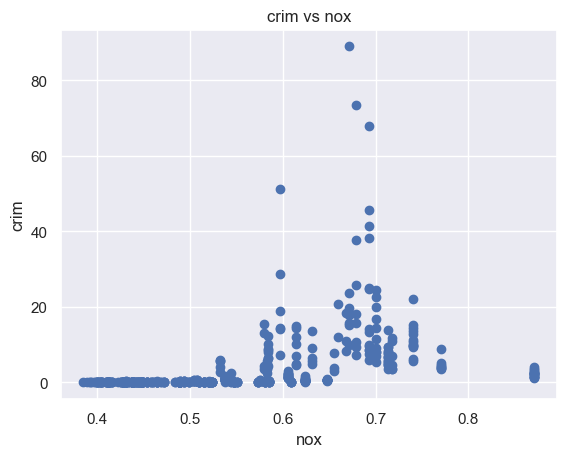

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7199      1.699     -8.073      0.000     -17.059     -10.381
nox           31.2485      2.999     10.419      0.000      25.356      37.141


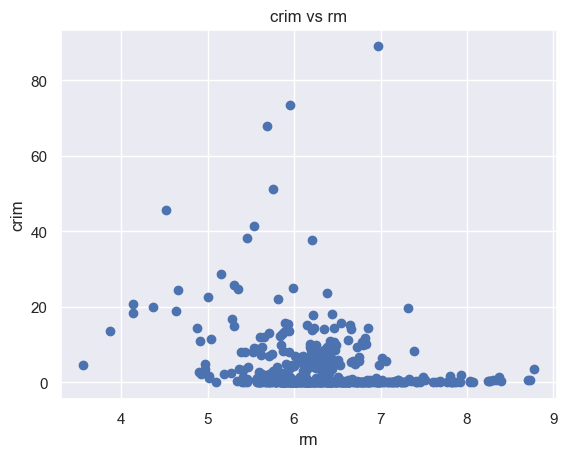

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4818      3.364      6.088      0.000      13.872      27.092
rm            -2.6841      0.532     -5.045      0.000      -3.729      -1.639


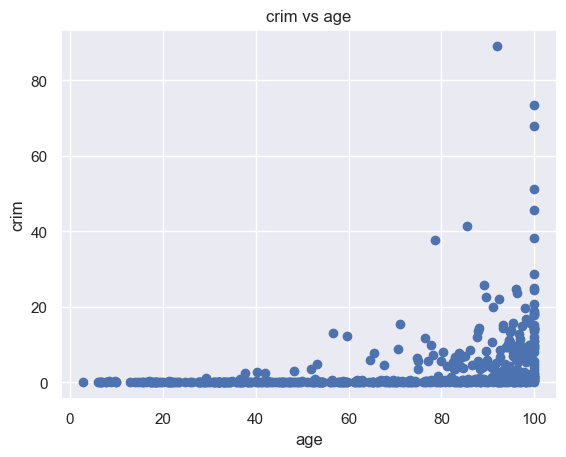

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7779      0.944     -4.002      0.000      -5.633      -1.923
age            0.1078      0.013      8.463      0.000       0.083       0.133


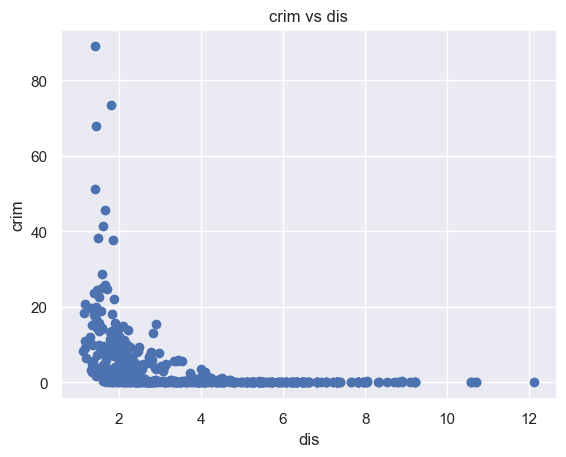

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4993      0.730     13.006      0.000       8.064      10.934
dis           -1.5509      0.168     -9.213      0.000      -1.882      -1.220


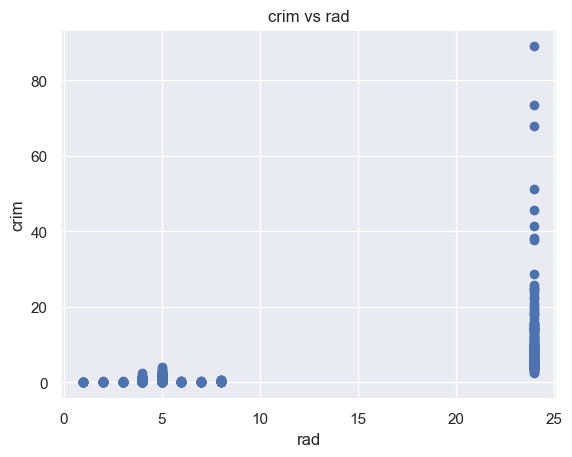

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2872      0.443     -5.157      0.000      -3.158      -1.416
rad            0.6179      0.034     17.998      0.000       0.550       0.685


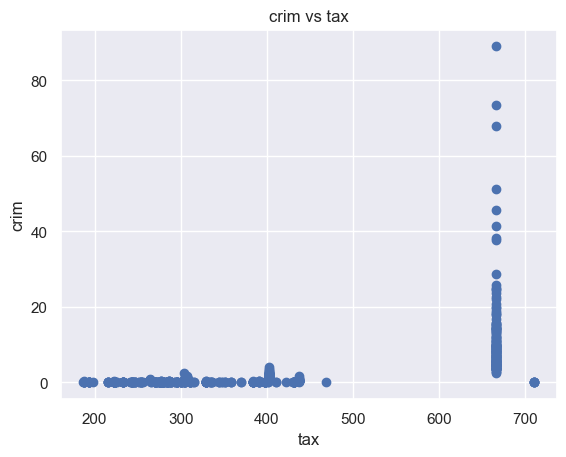

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5284      0.816    -10.454      0.000     -10.131      -6.926
tax            0.0297      0.002     16.099      0.000       0.026       0.033


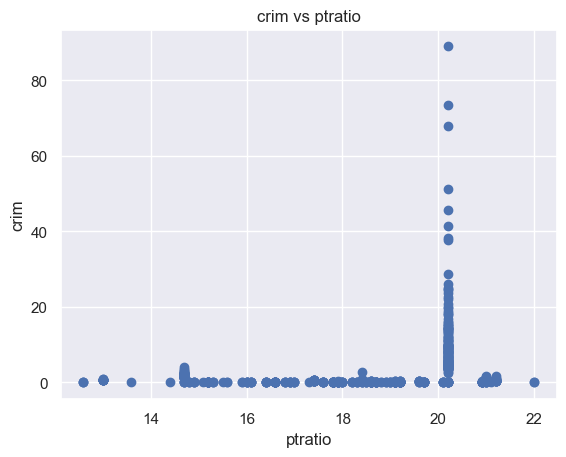

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.6469      3.147     -5.607      0.000     -23.830     -11.464
ptratio        1.1520      0.169      6.801      0.000       0.819       1.485


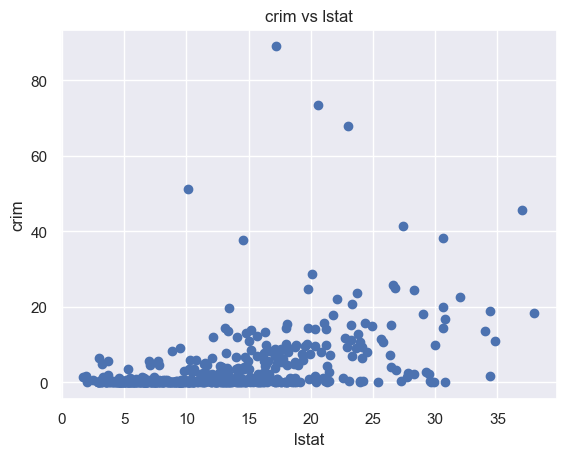

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3305      0.694     -4.801      0.000      -4.694      -1.968
lstat          0.5488      0.048     11.491      0.000       0.455       0.643


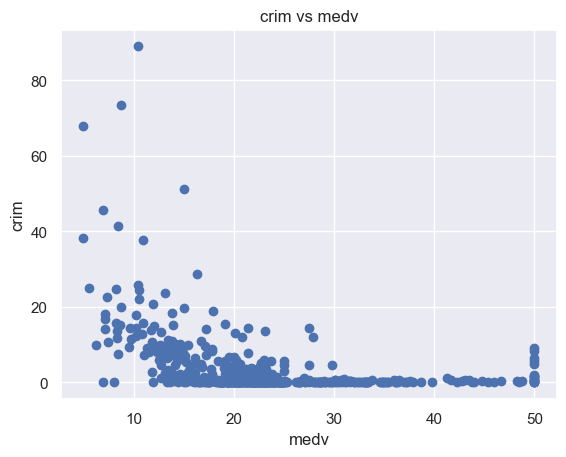

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7965      0.934     12.628      0.000       9.961      13.632
medv          -0.3632      0.038     -9.460      0.000      -0.439      -0.288


In [39]:
#we want to predict per capita crime rate.
df = pd.read_csv("Boston.csv", index_col=0)
y = df['crim'].values.reshape(-1, 1)
all_x = df.drop(['crim'], axis=1)


univar_coefficients = []
# y = df['Sales'].values.reshape(-1, 1)
for col in all_x:
    x = df[col]
    X = sm.add_constant(x)
    model = sm.OLS(y,X).fit()
    plt.scatter(x, y)
    plt.xlabel(col)
    plt.ylabel('crim')
    plt.title('crim vs {}'.format(col))
    plt.show()
    print(model.summary().tables[1]) 
    univar_coefficients.append(model.params[1])
    

all predictors have a p value of < 0.05 except for 'chas' so we acn determine that there is a statistically significant association between the predictors and response except for in 'chas'.

b)

In [40]:
X = sm.add_constant(all_x)
model = sm.OLS(y,X).fit()

print(model.summary()) 


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           2.03e-56
Time:                        18:40:11   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

The r squared is relatively high, which means that the model is a relatively good fit for the data. We can reject the null hypothesis for zn, dis, rad, and medv, as their p values are below our alpha of 0.05.  

c)

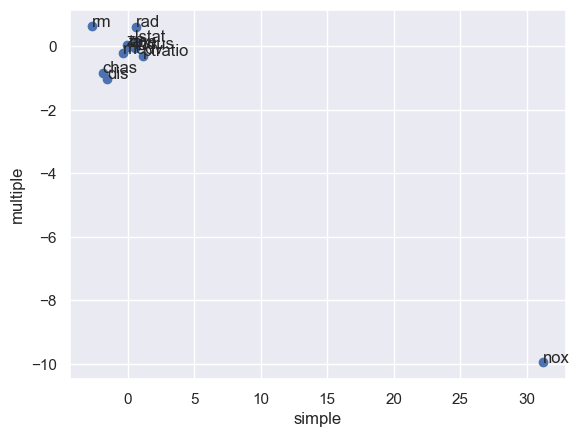

In [41]:

multiple_reg = model.params[1:]
data = pd.DataFrame(multiple_reg, columns = ['multiple'] )
data['univar'] = univar_coefficients
plt.scatter(data['univar'], data['multiple'])
plt.xlabel('simple')
plt.ylabel('multiple')

for index, row in data.iterrows():
    plt.annotate(index, (row['univar'], row['multiple']))
 
plt.show()


The results showed that there is a difference for the simple and multiple regression coefficients. This is due to the fact that in the simple regression, the slope represents the average effect of the predictor, ignoring other factors. In a multiple regression, the slop represents the average effect of the predictor holding other factors constant. 

d)

In [42]:
#we want to predict per capita crime rate.
df = pd.read_csv("Boston.csv", index_col=0)
y = df['crim'].values.reshape(-1, 1)
all_x = df.drop(['crim'], axis=1)


univar_coefficients = []
# y = df['Sales'].values.reshape(-1, 1)
for col in all_x:
    x = df[col]
    model = smf.ols(formula='crim  ~ {} + np.power({}, 2) + np.power({}, 3)'.format(col, col, col), data = df).fit()
    print(model.summary().tables[1]) 
    

                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433     11.192      0.000       3.995       5.697
zn                 -0.3322      0.110     -3.025      0.003      -0.548      -0.116
np.power(zn, 2)     0.0065      0.004      1.679      0.094      -0.001       0.014
np.power(zn, 3) -3.776e-05   3.14e-05     -1.203      0.230   -9.94e-05    2.39e-05
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.6626      1.574      2.327      0.020       0.570       6.755
indus                 -1.9652      0.482     -4.077      0.000      -2.912      -1.018
np.power(indus, 2)     0.2519      0.039      6.407      0.000       0.175       0.329
np.power(indus, 3)    -0.0070      0.001     -7.292      0.00

For zn, chas, rm, rad, tax, and lstat there was no statistical significance pointing to a non-linear association. For indus, nox, age, dis, ptratio, and medv there was a statistical significance pointing to a non-linear association. 